# HELIAD data exploration

In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 8.8 MB/s  0:00:01eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 8.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]


In [ ]:
!pip install pandas

  Using cached contourpy-1.3.3-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 7.7 MB/s  0:00:01m0:00:0100:01
Using cached contourpy-1.3.3-cp312-cp312-macosx_10_13_x86_64.whl (293 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 4.6 MB/s  0:00:00 eta 0:00:01
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_10_13_x86_64.whl (66 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 6.3 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [ ]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import pandas as pd

In [2]:
hdata = pd.read_csv("OUTCOME_DIAGNOSIS_processed.csv", header=0)

In [8]:
hdata.shape

(1648, 623)

## Participants' Age Distribution

In [11]:
import matplotlib.pyplot as plt

In [13]:
ages = hdata['AgeC']

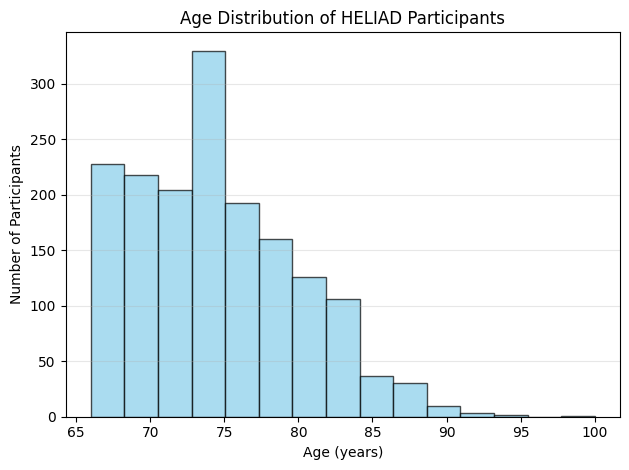

In [19]:
plt.hist(ages, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Age (years)')
plt.ylabel('Number of Participants')
plt.title('Age Distribution of HELIAD Participants')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

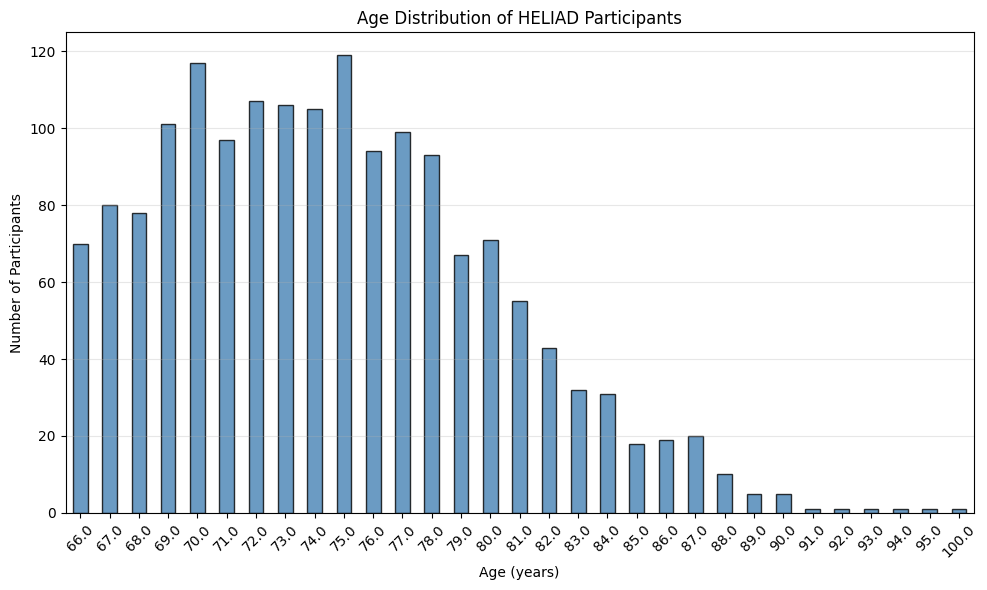

In [21]:
plt.figure(figsize=(10, 6))
age_counts = ages.value_counts().sort_index()
age_counts.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.8)
plt.xlabel('Age (years)')
plt.ylabel('Number of Participants')
plt.title('Age Distribution of HELIAD Participants')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Participants Demographics
_Note here: since the data was processed via SPSS, I assume the sex-encoding is based on {1=Male, 2=Female} and use it that way for the analysis following below. However, the counts that emerge from this assumption are aligend with the fact that participants are predominantly females with a proportion of 60% of the total study population (https://doi.org/10.1159/000362723)._

In [3]:
genders = hdata['SexC']
genders_text = genders.replace({1: 'Male',   2: 'Female'})

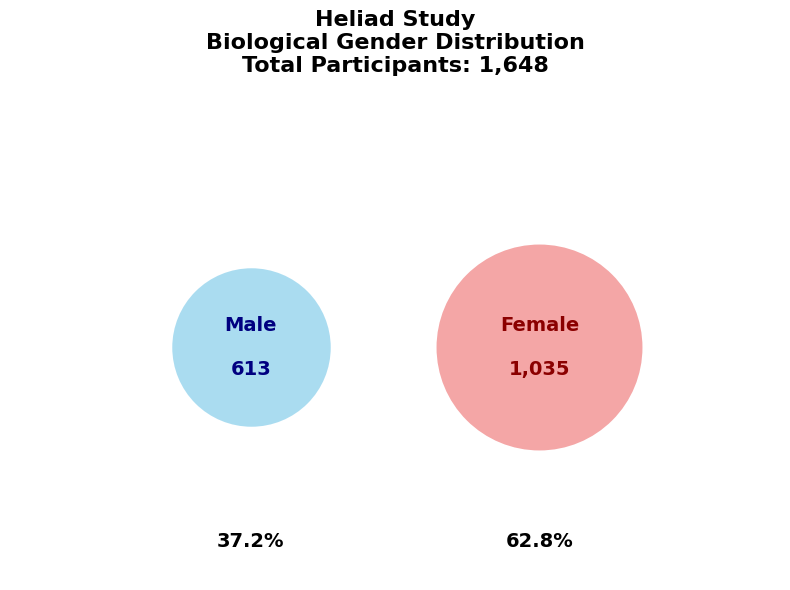

In [13]:
import matplotlib.pyplot as plt
import numpy as np

male_count = (genders == 1).sum()
female_count = (genders == 2).sum()
total = male_count + female_count
scale_factor = 35000
male_size = male_count / total * scale_factor
female_size = female_count / total * scale_factor
min_size = 3000
male_size = max(male_size, min_size)
female_size = max(female_size, min_size)

plt.figure(figsize=(8, 6))

plt.axis('off')

plt.scatter(0.35, 0.5, s=male_size, alpha=0.7, color='skyblue', 
            edgecolor='navy', linewidth=0, zorder=2)
plt.scatter(0.65, 0.5, s=female_size, alpha=0.7, color='lightcoral', 
            edgecolor='darkred', linewidth=0, zorder=2)

plt.text(0.35, 0.5, f'Male\n\n{male_count:,}', 
         ha='center', va='center', fontsize=14, fontweight='bold',
         color='navy', zorder=3)
plt.text(0.65, 0.5, f'Female\n\n{female_count:,}', 
         ha='center', va='center', fontsize=14, fontweight='bold',
         color='darkred', zorder=3)

plt.title(f'Heliad Study\nBiological Gender Distribution\nTotal Participants: {total:,}', 
          fontsize=16, fontweight='bold', pad=30)

plt.xlim(0.1, 0.9)
plt.ylim(0.2, 0.8)

plt.tight_layout()
plt.show()

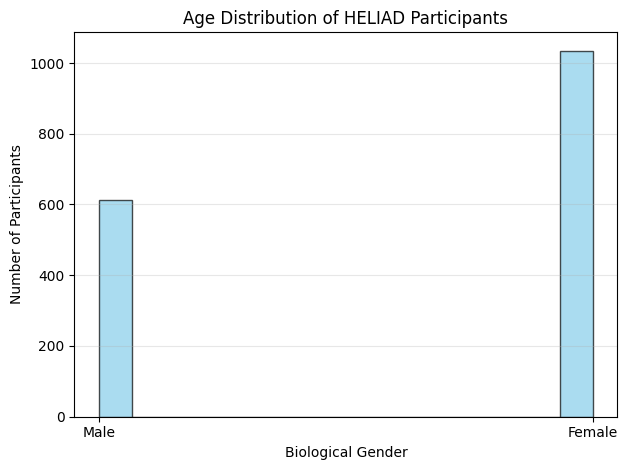

In [ ]:
plt.hist(genders_text, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Biological Gender')
plt.ylabel('Number of Participants')
plt.title('Biological Distribution of HELIAD Participants')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
hdata['SexD'] = hdata['SexC'].replace({1: 'Male', 2: 'Female'})

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_8669/3524703997.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hdata['SexD'] = hdata['SexC'].replace({1: 'Male', 2: 'Female'})


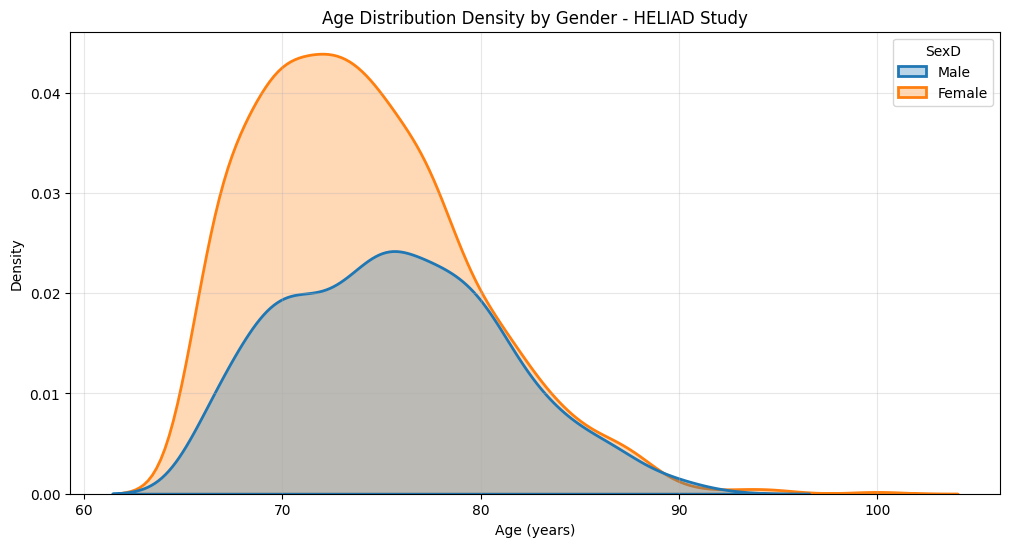

In [39]:
plt.figure(figsize=(12, 6))

# Using seaborn for smooth density plots
import seaborn as sns

sns.kdeplot(data=hdata, x='AgeC', hue='SexD', 
           fill=True, alpha=0.3, linewidth=2)

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution Density by Gender - HELIAD Study')
plt.grid(True, alpha=0.3)
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_18750/341507739.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(gender_data, labels=['Male', 'Female'],


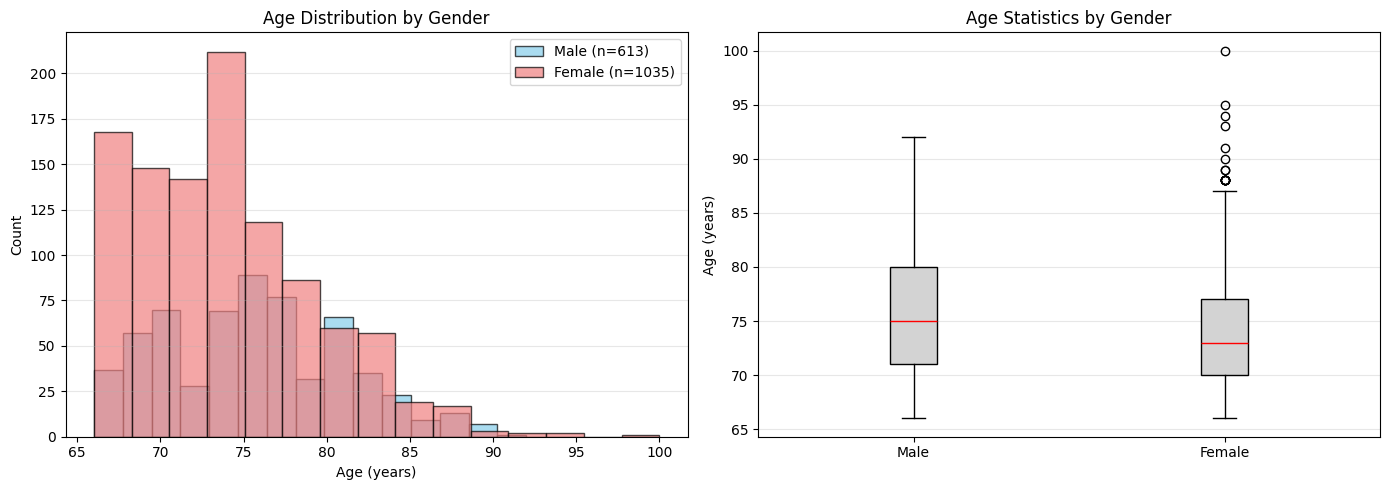


AGE SUMMARY BY GENDER:
Male participants: 613
  Mean ± SD: 75.6 ± 5.5 years
  Range: 66 - 92 years

Female participants: 1035
  Mean ± SD: 74.0 ± 5.4 years
  Range: 66 - 100 years


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

male_data = hdata[hdata['SexD'] == 'Male']['AgeC'].dropna()
female_data = hdata[hdata['SexD'] == 'Female']['AgeC'].dropna()

ax1.hist(male_data, bins=15, alpha=0.7, label=f'Male (n={len(male_data)})', 
         color='skyblue', edgecolor='black')
ax1.hist(female_data, bins=15, alpha=0.7, label=f'Female (n={len(female_data)})', 
         color='lightcoral', edgecolor='black')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Count')
ax1.set_title('Age Distribution by Gender')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

gender_data = [male_data, female_data]
ax2.boxplot(gender_data, labels=['Male', 'Female'], 
            patch_artist=True,
            boxprops=dict(facecolor='lightgray'),
            medianprops=dict(color='red'))
ax2.set_ylabel('Age (years)')
ax2.set_title('Age Statistics by Gender')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{'='*50}")
print("AGE SUMMARY BY GENDER:")
print(f"{'='*50}")
print(f"Male participants: {len(male_data)}")
print(f"  Mean ± SD: {male_data.mean():.1f} ± {male_data.std():.1f} years")
print(f"  Range: {male_data.min():.0f} - {male_data.max():.0f} years")
print(f"\nFemale participants: {len(female_data)}")
print(f"  Mean ± SD: {female_data.mean():.1f} ± {female_data.std():.1f} years")
print(f"  Range: {female_data.min():.0f} - {female_data.max():.0f} years")

## BMI Distribution per Participants' Age

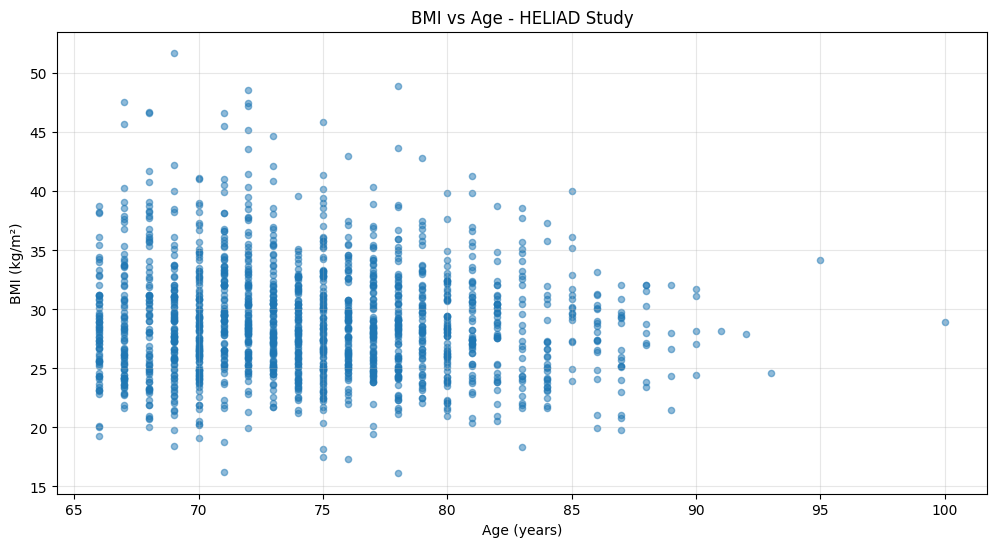

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(hdata['AgeC'], hdata['BMI'], alpha=0.5, s=20)
plt.xlabel('Age (years)')
plt.ylabel('BMI (kg/m²)')
plt.title('BMI vs Age - HELIAD Study')
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1200x600 with 0 Axes>

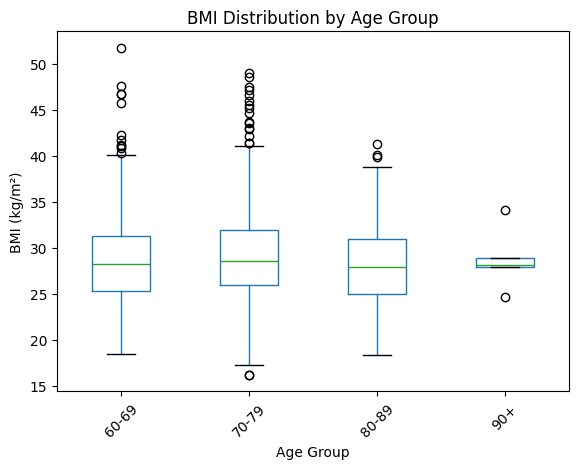

In [32]:
hdata['age_group'] = pd.cut(hdata['AgeC'], 
                         bins=[60, 70, 80, 90, 100],
                         labels=['60-69', '70-79', '80-89', '90+'])

plt.figure(figsize=(12, 6))
hdata.boxplot(column='BMI', by='age_group', grid=False)
plt.xlabel('Age Group')
plt.ylabel('BMI (kg/m²)')
plt.title('BMI Distribution by Age Group')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)
plt.show()

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.violinplot(x='age_group', y='BMI', data=hdata, palette='coolwarm')
plt.xlabel('Age Group')
plt.ylabel('BMI (kg/m²)')
plt.title('BMI Distribution by Age Group - HELIAD Study')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `age_group` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

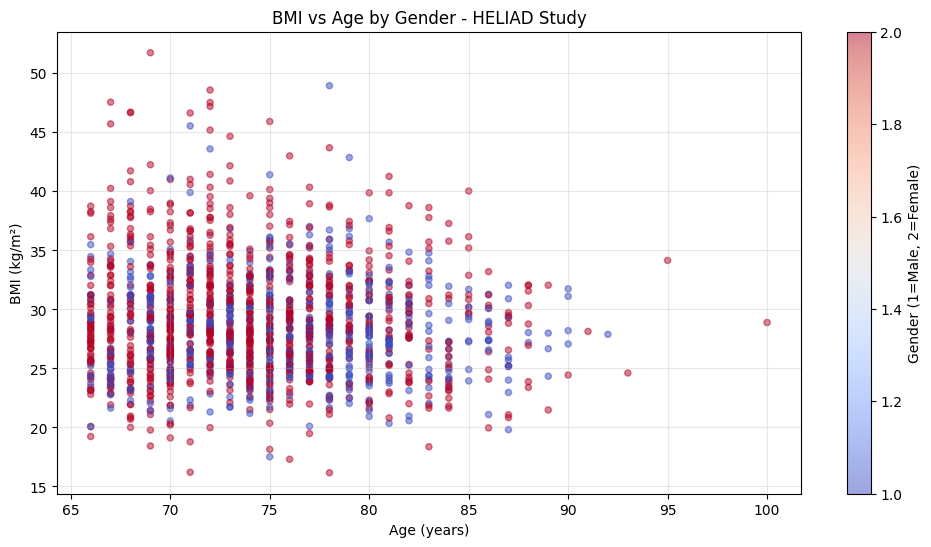

In [18]:
import seaborn as sns

# Create gender labels if not already there

plt.figure(figsize=(12, 6))

# Scatter plot with color by gender
scatter = plt.scatter(hdata['AgeC'], hdata['BMI'], 
                     c=hdata['SexC'],  # Color by gender
                     cmap='coolwarm', 
                     alpha=0.5, 
                     s=20)

plt.xlabel('Age (years)')
plt.ylabel('BMI (kg/m²)')
plt.title('BMI vs Age by Gender - HELIAD Study')
plt.colorbar(scatter, label='Gender (1=Male, 2=Female)')
plt.grid(True, alpha=0.3)
plt.show()

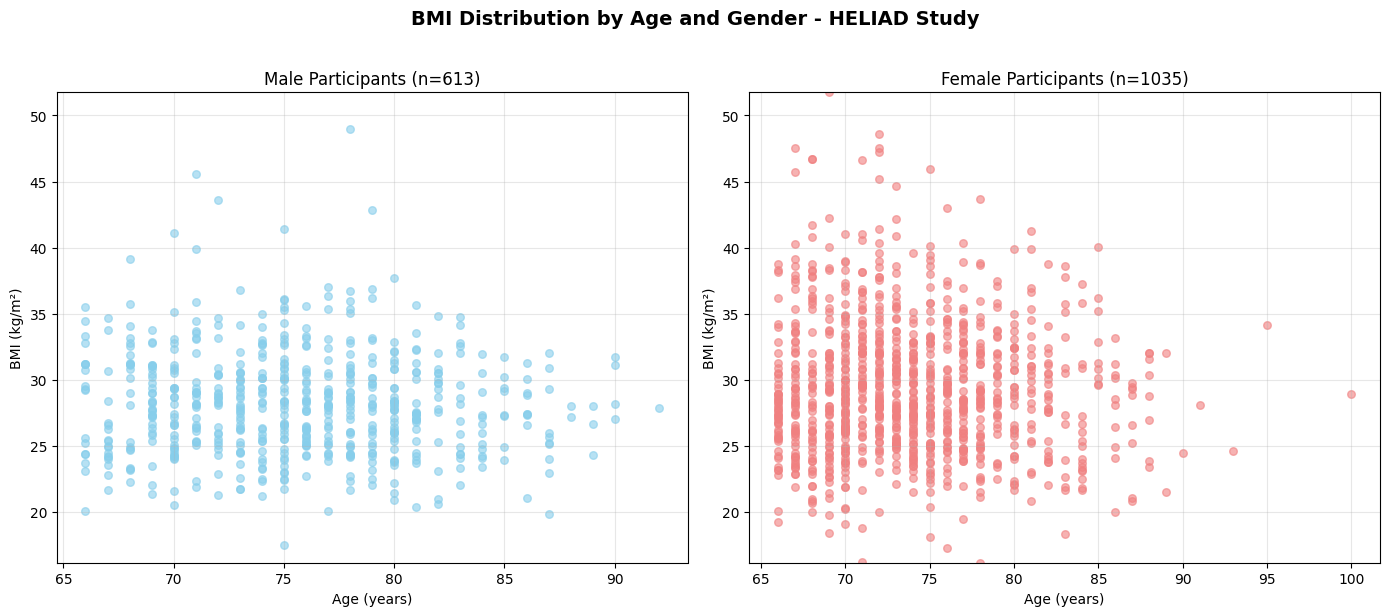

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

male_data = hdata[hdata['SexC'] == 1]
ax1.scatter(male_data['AgeC'], male_data['BMI'], 
           alpha=0.6, color='skyblue', s=30)
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('BMI (kg/m²)')
ax1.set_title(f'Male Participants (n={len(male_data)})')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([hdata['BMI'].min(), hdata['BMI'].max()])

female_data = hdata[hdata['SexC'] == 2]
ax2.scatter(female_data['AgeC'], female_data['BMI'], 
           alpha=0.6, color='lightcoral', s=30)
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('BMI (kg/m²)')
ax2.set_title(f'Female Participants (n={len(female_data)})')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([hdata['BMI'].min(), hdata['BMI'].max()])

plt.suptitle('BMI Distribution by Age and Gender - HELIAD Study', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

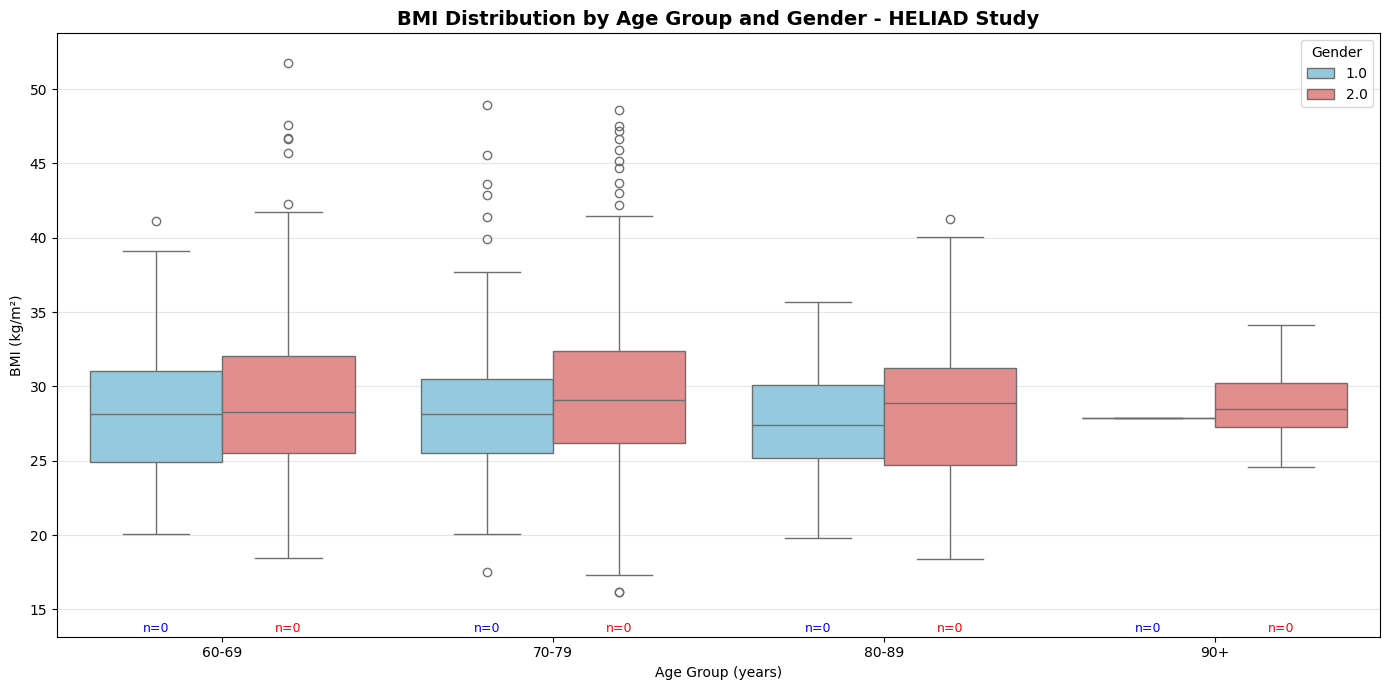

In [32]:
# Create age groups
hdata['age_group'] = pd.cut(hdata['AgeC'], 
                         bins=[60, 70, 80, 90, 100],
                         labels=['60-69', '70-79', '80-89', '90+'])

plt.figure(figsize=(14, 7))

# Create box plot
sns.boxplot(x='age_group', y='BMI', hue='SexC', data=hdata, palette=['skyblue', 'lightcoral'])

plt.xlabel('Age Group (years)')
plt.ylabel('BMI (kg/m²)')
plt.title('BMI Distribution by Age Group and Gender - HELIAD Study', fontsize=14, fontweight='bold')
plt.legend(title='Gender')
plt.grid(True, alpha=0.3, axis='y')

# Add sample sizes
age_gender_counts = hdata.groupby(['age_group', 'SexC']).size().unstack()
for i, age_group in enumerate(hdata['age_group'].cat.categories):
    if age_group in age_gender_counts.index:
        male_count = age_gender_counts.loc[age_group, 'Male'] if 'Male' in age_gender_counts.columns else 0
        female_count = age_gender_counts.loc[age_group, 'Female'] if 'Female' in age_gender_counts.columns else 0
        plt.text(i-0.2, hdata['BMI'].min() - 2, f'n={male_count}', 
                ha='center', va='top', fontsize=9, color='blue')
        plt.text(i+0.2, hdata['BMI'].min() - 2, f'n={female_count}', 
                ha='center', va='top', fontsize=9, color='red')

plt.ylim([hdata['BMI'].min() - 3, hdata['BMI'].max() + 2])
plt.tight_layout()
plt.show()

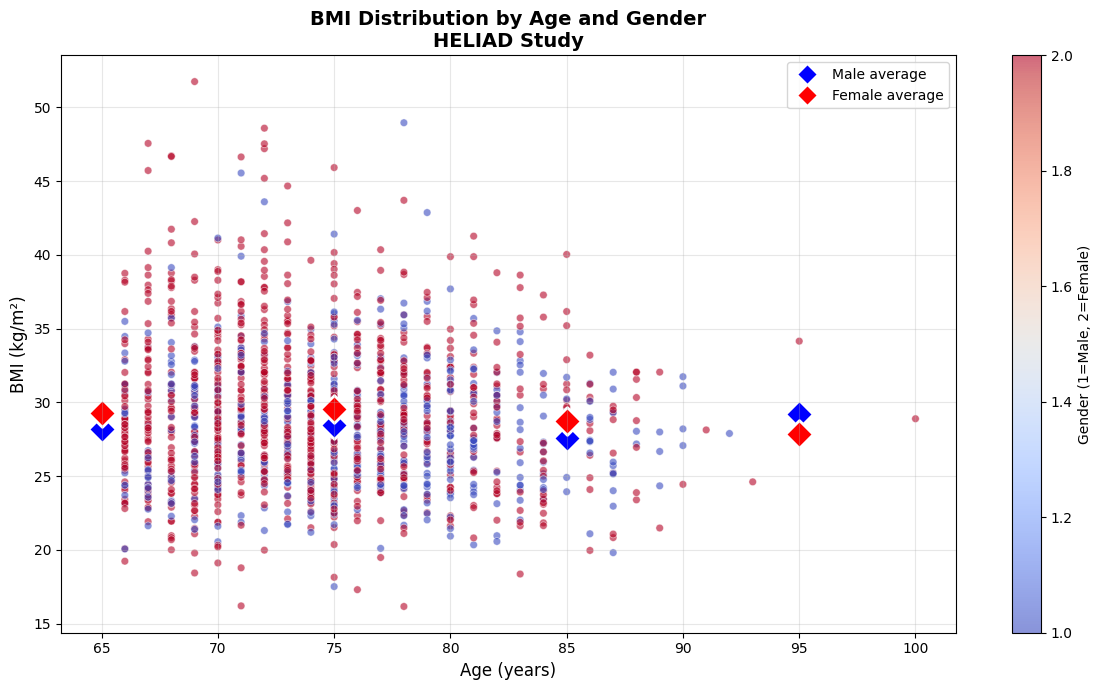

In [ ]:
plt.figure(figsize=(12, 7))

# Create a colormap for age
norm = plt.Normalize(hdata['AgeC'].min(), hdata['AgeC'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Plot with age-based coloring
scatter = plt.scatter(hdata['AgeC'], hdata['BMI'], 
                     c=hdata['SexC'],  # Color by gender
                     cmap='coolwarm', 
                     alpha=0.6, 
                     s=30,
                     edgecolor='white',
                     linewidth=0.5)

# Add gender averages per decade
for gender, color, label in [(1, 'blue', 'Male'), (2, 'red', 'Female')]:
    gender_data = hdata[hdata['SexC'] == gender]
    for age in range(50, 100, 10):
        age_data = gender_data[(gender_data['AgeC'] >= age) & (gender_data['AgeC'] < age+10)]
        if len(age_data) > 0:
            mean_bmi = age_data['BMI'].mean()
            plt.scatter(age+5, mean_bmi, color=color, s=200, 
                       edgecolor='white', linewidth=2, marker='D', 
                       label=f'{label} mean' if age == 50 else "")

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('BMI (kg/m²)', fontsize=12)
plt.title('BMI Distribution by Age and Gender\nHELIAD Study', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Gender (1=Male, 2=Female)')
plt.grid(True, alpha=0.3)

# Add legend for the diamond markers
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='D', color='w', label='Male average',
                          markerfacecolor='blue', markersize=10, markeredgecolor='white'),
                   Line2D([0], [0], marker='D', color='w', label='Female average',
                          markerfacecolor='red', markersize=10, markeredgecolor='white')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

## Nutritional Aspects

In [40]:
nutridict = {
    "FFQ1": "Milk_Yoghurt",
    "FFQ2": "Milk_Yoghurt_LowFat",
    "FFQ3": "Yellow_Cheese",
    "FFQ4": "Feta_Cheese",
    "FFQ5": "Cheese_LowFat",
    "FFQ6": "Eggs",
    "FFQ7": "White_Bread",
    "FFQ8": "Wholemeal_Bread",
    "FFQ11": "Cereals",
    "FFQ12": "White_Rice",
    "FFQ13": "Brown_Rice",
    "FFQ14": "Pasta",
    "FFQ15": "Pasta_Wholemeal",
    "FFQ16": "Potatoes_Boiled",
    "FFQ17": "Potatoes_Fried",
    "FFQ18": "Veal",
    "FFQ19": "Meat_Balls",
    "FFQ20": "Chicken",
    "FFQ21": "Pork",
    "FFQ22": "Lamb_Goat_Game",
    "FFQ23": "Meat_Cold_Sliced",
    "FFQ24": "Sausages",
    "FFQ25": "Meat_Cold_Sliced_LowFat",
    "FFQ26": "Fish_Small",
    "FFQ27": "Fish_Large",
    "FFQ28": "Seafood_Misc",
    "FFQ29": "Legumes",
    "FFQ30": "Spinach",
    "FFQ31": "Pastitsio_Moussaka_Papoutsakia",
    "FFQ32": "Petit_Pois",
    "FFQ33": "Tomato_Cucumber_Carrot_Pepper",
    "FFQ34": "Lettuce_Cabbage_Spinach_Rocket",
    "FFQ35": "Broccoli_Cauliflower_Courgette",
    "FFQ37": "Orange",
    "FFQ38": "Apples_Pears",
    "FFQ39": "Winter_Fruits_Misc",
    "FFQ40": "Banana",
    "FFQ41": "Summer_Fruits_Misc",
    "FFQ43": "Fruits_Dried",
    "FFQ44": "Nuts",
    "FFQ45": "Pies",
    "FFQ46": "Pies",
    "FFQ48": "Cakes",
    "FFQ49": "Sweets_Preserved",
    "FFQ50": "Cakes",
    "FFQ51": "Cakes",
    "FFQ52": "Chocolate",
    "FFQ53": "Ice_Cream",
    "FFQ54": "Salty_Snacks",
    "FFQ55": "Honey_Marmalade",
    "FFQ56": "Olives",
    "FFQ57": "Wine",
    "FFQ58": "Beer",
    "FFQ59": "Alcohold_Misc",
    "FFQ60": "Soda",
    "FFQ61": "Soda",
    "FFQ62": "Coffee",
    "FFQ63": "Tea",
    "FFQ64": "Mayonnaise",
    "FFQ65": "Mayonnaise",
    "FFQ66": "Olive_Oil_Freq",
    "FFQ67": "Seed_Oil_Freq",
    "FFQ68": "Margarine_Freq",
    "FFQ69": "Butter_Freq"
}

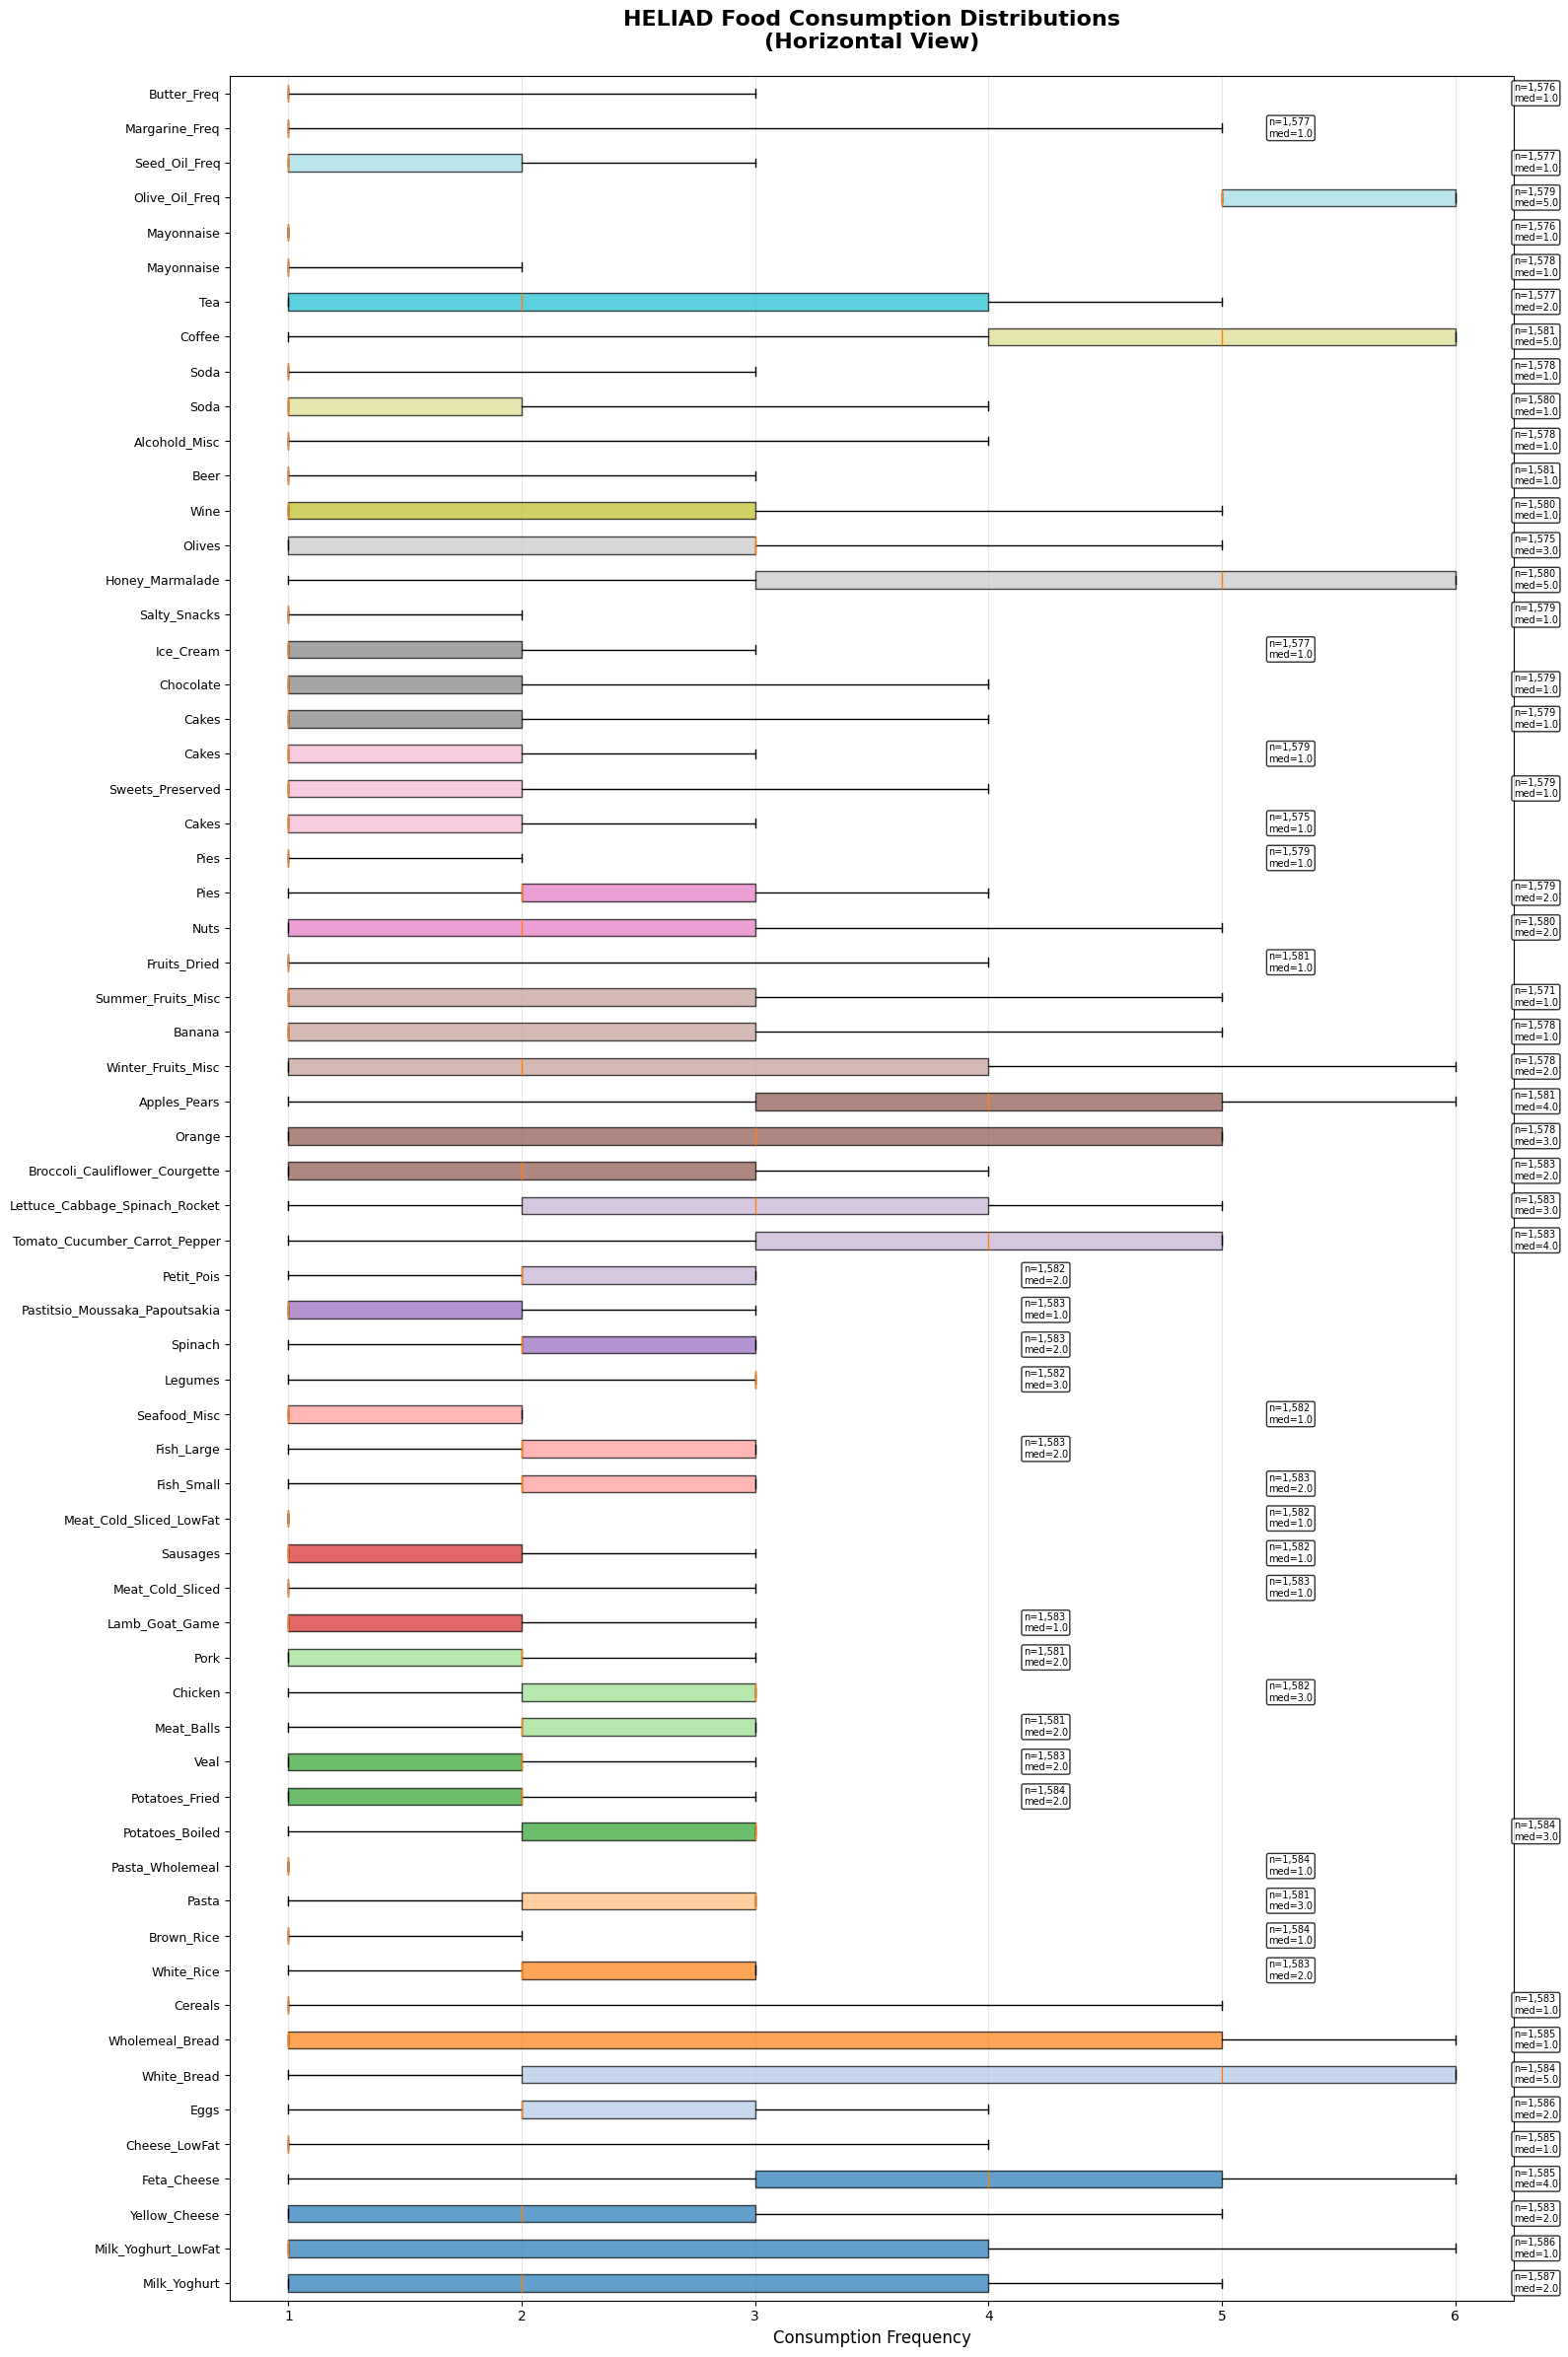

In [43]:
plt.figure(figsize=(16, 24))

# Prepare data (same as Option 1)
box_data = []
labels = []

for ffq_code, food_name in nutridict.items():
    if ffq_code in hdata.columns:
        data = hdata[ffq_code].dropna()
        box_data.append(data)
        labels.append(food_name)
    elif food_name in df.columns:
        data = hdata[food_name].dropna()
        box_data.append(data)
        labels.append(food_name)

# Horizontal boxplot
bp = plt.boxplot(box_data, vert=False, patch_artist=True,
                showfliers=False, whis=[5, 95])

# Color coding (simplified)
color_map = plt.cm.tab20(np.linspace(0, 1, len(box_data)))
for patch, color in zip(bp['boxes'], color_map):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Labels on y-axis
plt.yticks(range(1, len(labels) + 1), labels, fontsize=9)
plt.xlabel('Consumption Frequency', fontsize=12)
plt.title('HELIAD Food Consumption Distributions\n(Horizontal View)', 
          fontsize=16, fontweight='bold', pad=20)

# Add grid
plt.grid(True, alpha=0.3, axis='x')

# Add statistics on the side
for i, data in enumerate(box_data):
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    plt.text(data.max() + (data.max()-data.min())*0.05, i+1,
             f'n={len(data):,}\nmed={median:.1f}',
             va='center', fontsize=7,
             bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [7]:
category_to_ffq = {}
for ffq, category in nutridict.items():
    if ffq in hdata.columns:
        if category not in category_to_ffq:
            category_to_ffq[category] = []
        category_to_ffq[category].append(ffq)

for category, ffq_cols in category_to_ffq.items():
    if len(ffq_cols) == 1:
        hdata[category] = hdata[ffq_cols[0]]
    else:
        hdata[category] = hdata[ffq_cols].max(axis=1, skipna=True)

nutrition_cols = list(category_to_ffq.keys())

medical_features = {
    'I11c': 'Constipation',
    'I9': 'REM_Sleep_Behavior_Disorder',
    'I6': 'Motor_Symptoms_Parkinsonism',
    'I1a': 'Fluctuation_Consciousness',
    'I1b': 'Fluctuation_Cognition',
    'I11a': 'Orthostatic_Hypotension',
    'I4a': 'Episodes_Blank_Switch_Off'
}

demographic_cols = ['AgeC', 'SexD', 'BMI']

available_medical = [col for col in medical_features.keys() if col in hdata.columns]
print(f"Found {len(available_medical)}/{len(medical_features)} medical features in dataset")

subset_cols = demographic_cols + available_medical + nutrition_cols
heliad_subset = hdata[subset_cols].copy()

heliad_subset = heliad_subset.rename(columns=medical_features)

print(f"\n{'='*60}")
print("HELIAD SUBSET CREATED SUCCESSFULLY")
print(f"{'='*60}")
print(f"Total rows: {len(heliad_subset)}")
print(f"Total columns: {len(heliad_subset.columns)}")
print(f"\nColumn breakdown:")
print(f"- Demographic features: {len(demographic_cols)}")
print(f"- Medical features: {len(available_medical)}")
print(f"- Nutrition features: {len(nutrition_cols)}")

print(f"\n{'='*60}")
print("MISSING DATA SUMMARY")
print(f"{'='*60}")
missing_summary = heliad_subset.isnull().sum()
missing_percentage = (missing_summary / len(heliad_subset)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df.head(15))



Found 7/7 medical features in dataset

HELIAD SUBSET CREATED SUCCESSFULLY
Total rows: 1648
Total columns: 69

Column breakdown:
- Demographic features: 3
- Medical features: 7
- Nutrition features: 59

MISSING DATA SUMMARY
                    Missing_Count  Missing_Percentage
Summer_Fruits_Misc             77            4.672330
Olives                         73            4.429612
Butter_Freq                    72            4.368932
Tea                            71            4.308252
BMI                            71            4.308252
Margarine_Freq                 71            4.308252
Seed_Oil_Freq                  71            4.308252
Ice_Cream                      71            4.308252
Mayonnaise                     70            4.247573
Banana                         70            4.247573
Winter_Fruits_Misc             70            4.247573
Alcohold_Misc                  70            4.247573
Orange                         70            4.247573
Chocolate            

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_3375/2434311731.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hdata[category] = hdata[ffq_cols[0]]
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_3375/2434311731.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hdata[category] = hdata[ffq_cols].max(axis=1, skipna=True)
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_3375/2434311731.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

In [8]:
output_path = 'heliad_nutrition_medical_subset.csv'
heliad_subset.to_csv(output_path, index=False)

In [9]:
heliad_subset.head()

,AgeC,SexD,BMI,Constipation,REM_Sleep_Behavior_Disorder,Motor_Symptoms_Parkinsonism,Fluctuation_Consciousness,Fluctuation_Cognition,Orthostatic_Hypotension,Episodes_Blank_Switch_Off,...,Beer,Alcohold_Misc,Soda,Coffee,Tea,Mayonnaise,Olive_Oil_Freq,Seed_Oil_Freq,Margarine_Freq,Butter_Freq
0,76.0,Male,28.28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,1.0,5.0,1.0,1.0,6.0,2.0,2.0,1.0
1,83.0,Male,32.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,6.0,1.0,1.0,6.0,1.0,1.0,1.0
2,87.0,Female,29.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,5.0,1.0,1.0,6.0,2.0,1.0,1.0
3,71.0,Female,25.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,5.0,5.0,1.0,6.0,1.0,1.0,1.0
4,78.0,Male,24.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,5.0,1.0,1.0,6.0,1.0,1.0,1.0


In [10]:
heliad_subset_clean = heliad_subset.dropna()

In [33]:
nutri_dict_grouped = {
    "Dairy": [
        "Milk_Yoghurt",
        "Milk_Yoghurt_LowFat",
        "Yellow_Cheese",
        "Feta_Cheese",
        "Cheese_LowFat"
    ],
    "Refined_Grains": [
        "White_Bread",
        "Cereals",
        "White_Rice",
        "Pasta"
    ],
    "Whole_Grains": [
        "Wholemeal_Bread",
        "Brown_Rice",
        "Pasta_Wholemeal"
    ],
    "Red_Meats": [
        "Veal",
        "Pork",
        "Lamb_Goat_Game"
    ],
    "Processed_Foods": [
        "Potatoes_Fried",
        "Meat_Balls",
        "Meat_Cold_Sliced",
        "Meat_Cold_Sliced_LowFat",
        "Salty_Snacks",
        "Mayonnaise",
        "Soda",
        "Sausages"
    ],
    "Seafood": [
        "Fish_Small",
        "Fish_Large",
        "Seafood_Misc"
    ],
    "Vegetables": [
        "Potatoes_Boiled",
        "Spinach",
        "Tomato_Cucumber_Carrot_Pepper",
        "Lettuce_Cabbage_Spinach_Rocket",
        "Broccoli_Cauliflower_Courgette"
    ],
    "Fruits": [
        "Orange",
        "Apples_Pears",
        "Winter_Fruits_Misc",
        "Banana",
        "Summer_Fruits_Misc"
    ],
    "Composite_Dishes": [
        "Pastitsio_Moussaka_Papoutsakia",
        "Pies"
    ],
    "Sweets": [
        "Cakes",
        "Sweets_Preserved",
        "Chocolate",
        "Ice_Cream",
        "Honey_Marmalade"
    ],
    "Alcohol": [
        "Wine",
        "Beer",
        "Alcohold_Misc"
    ]
}

In [44]:
category_colors = {
    'Dairy': 'lightblue',
    'Refined_Grains': 'wheat',
    'Whole_Grains': 'lightcoral',
    'Red_Meats': 'lightgreen',
    'Processed_Foods': 'gold',
    'Seafood': 'pink',
    'Vegetables': 'plum',
    'Fruits': 'lavender',
    'Composite_Dishes': 'lightgray',
    'Sweets': 'purple',
    'Alcohol': 'red'
}

In [54]:
# Check skewness before deciding
for category, foods in list(nutri_dict_grouped.items())[:3]:
    print(f"\n{category}:")
    for food in foods[:2]:  # Check first 2 foods
        for ffq_code, food_name in nutridict.items():
            if food_name == food:
                data = hdata[ffq_code].dropna()
                if len(data) > 0:
                    skewness = data.skew()
                    print(f"  {food}: skew = {skewness:.2f}")
                    if abs(skewness) > 1:
                        print(f"    → Highly skewed, consider log transform")
                break


Dairy:
  Milk_Yoghurt: skew = 0.45
  Milk_Yoghurt_LowFat: skew = 0.66

Refined_Grains:
  White_Bread: skew = -0.70
  Cereals: skew = 2.06
    → Highly skewed, consider log transform

Whole_Grains:
  Wholemeal_Bread: skew = 0.71
  Brown_Rice: skew = 5.13
    → Highly skewed, consider log transform


IndexError: index 9 is out of bounds for axis 0 with size 9

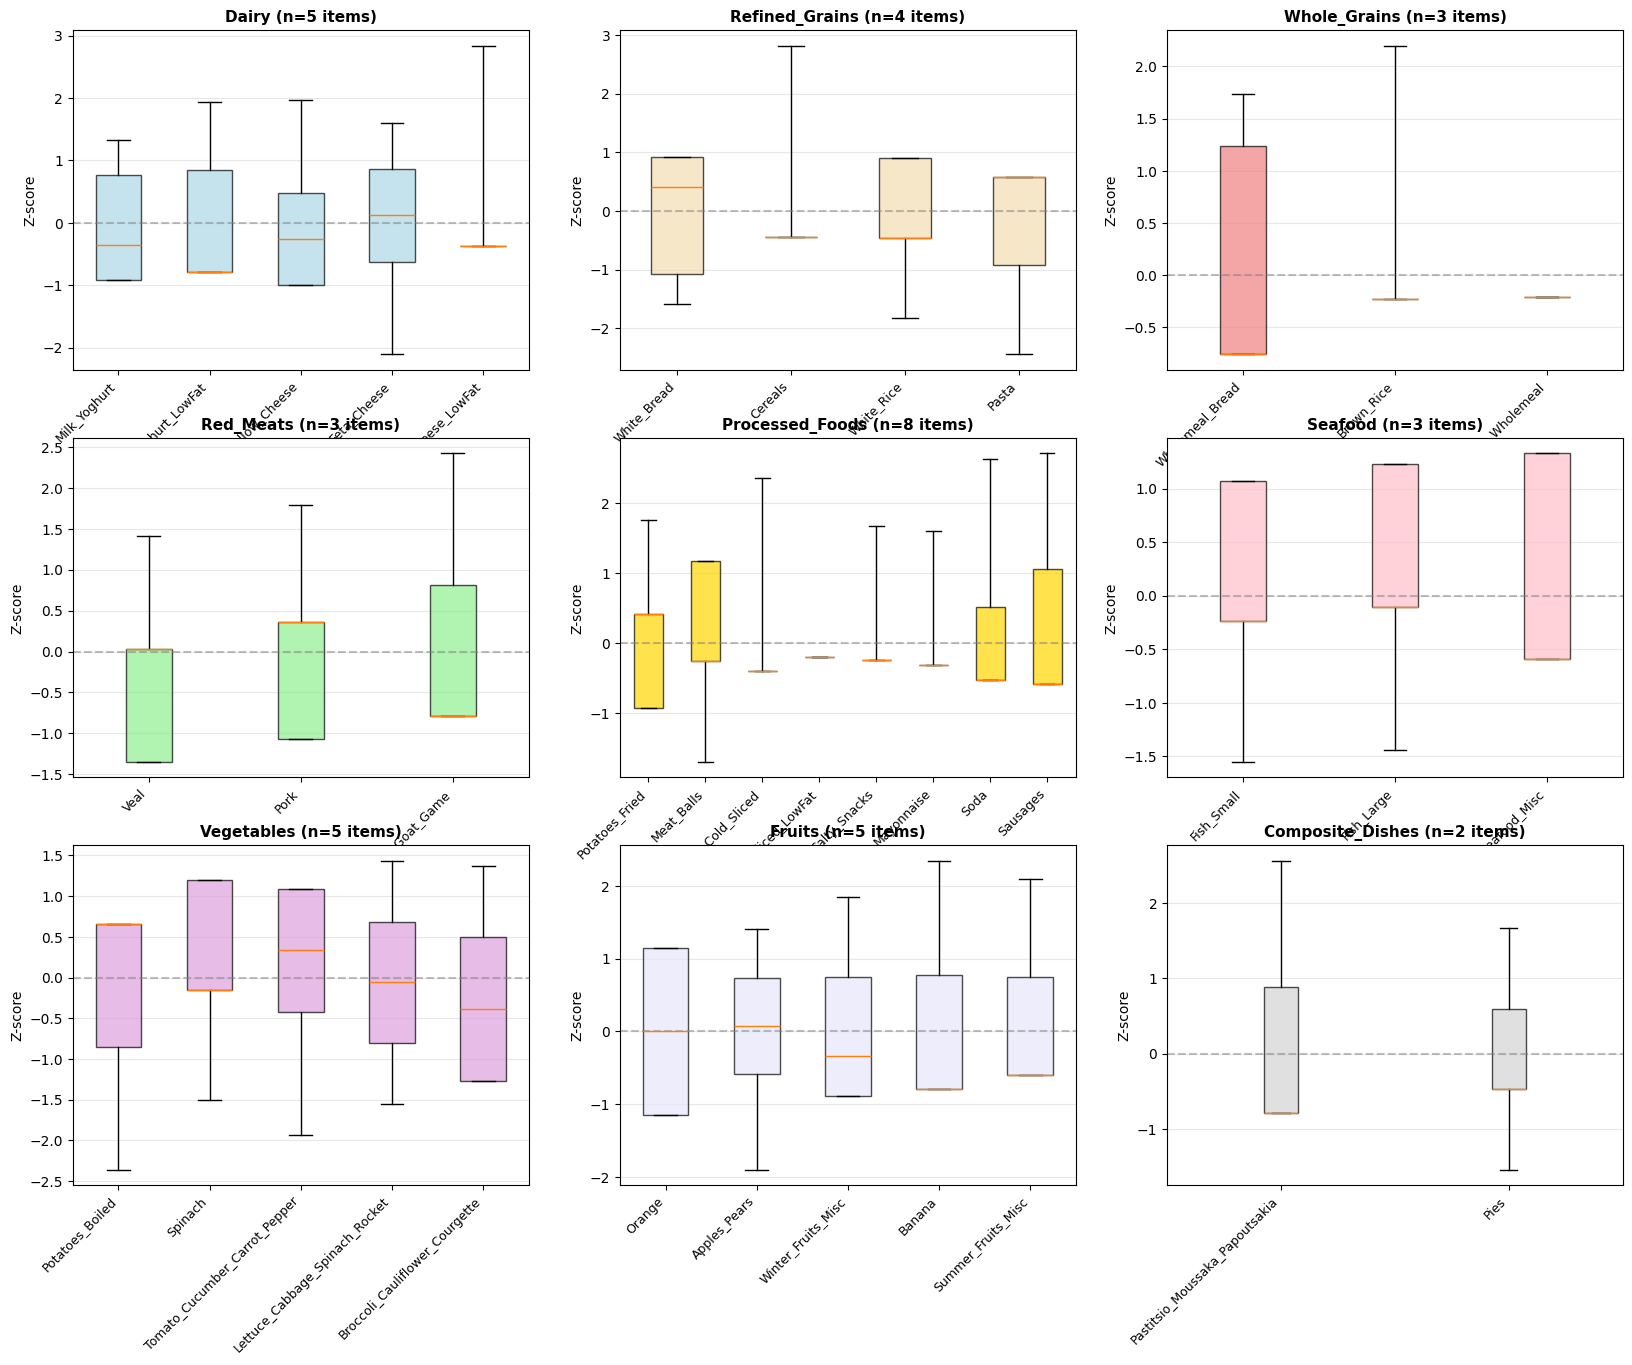

In [59]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, (category, foods) in enumerate(nutri_dict_grouped.items()):
        
    ax = axes[idx]
    
    category_data = []
    category_labels = []
    
    for food in foods:
        for ffq_code, food_name in nutridict.items():
            if food_name == food:
                data = hdata[ffq_code].dropna()
                if len(data) > 0:
                    z_data = (data - data.mean()) / data.std()
                    category_data.append(z_data)
                    category_labels.append(food)
                    break
    
    if category_data:
        bp = ax.boxplot(category_data, vert=True, patch_artist=True,
                       showfliers=False, whis=[5, 95])
        
        for patch in bp['boxes']:
            patch.set_facecolor(category_colors[category])
            patch.set_alpha(0.7)
        
        ax.set_xticks(range(1, len(category_labels) + 1))
        ax.set_xticklabels(category_labels, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Z-score')
        ax.set_title(f'{category} (n={len(category_data)} items)', 
                    fontsize=11, fontweight='bold')
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)  # Reference line
        ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('HELIAD Study: Food Consumption by Category (Z-scores)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

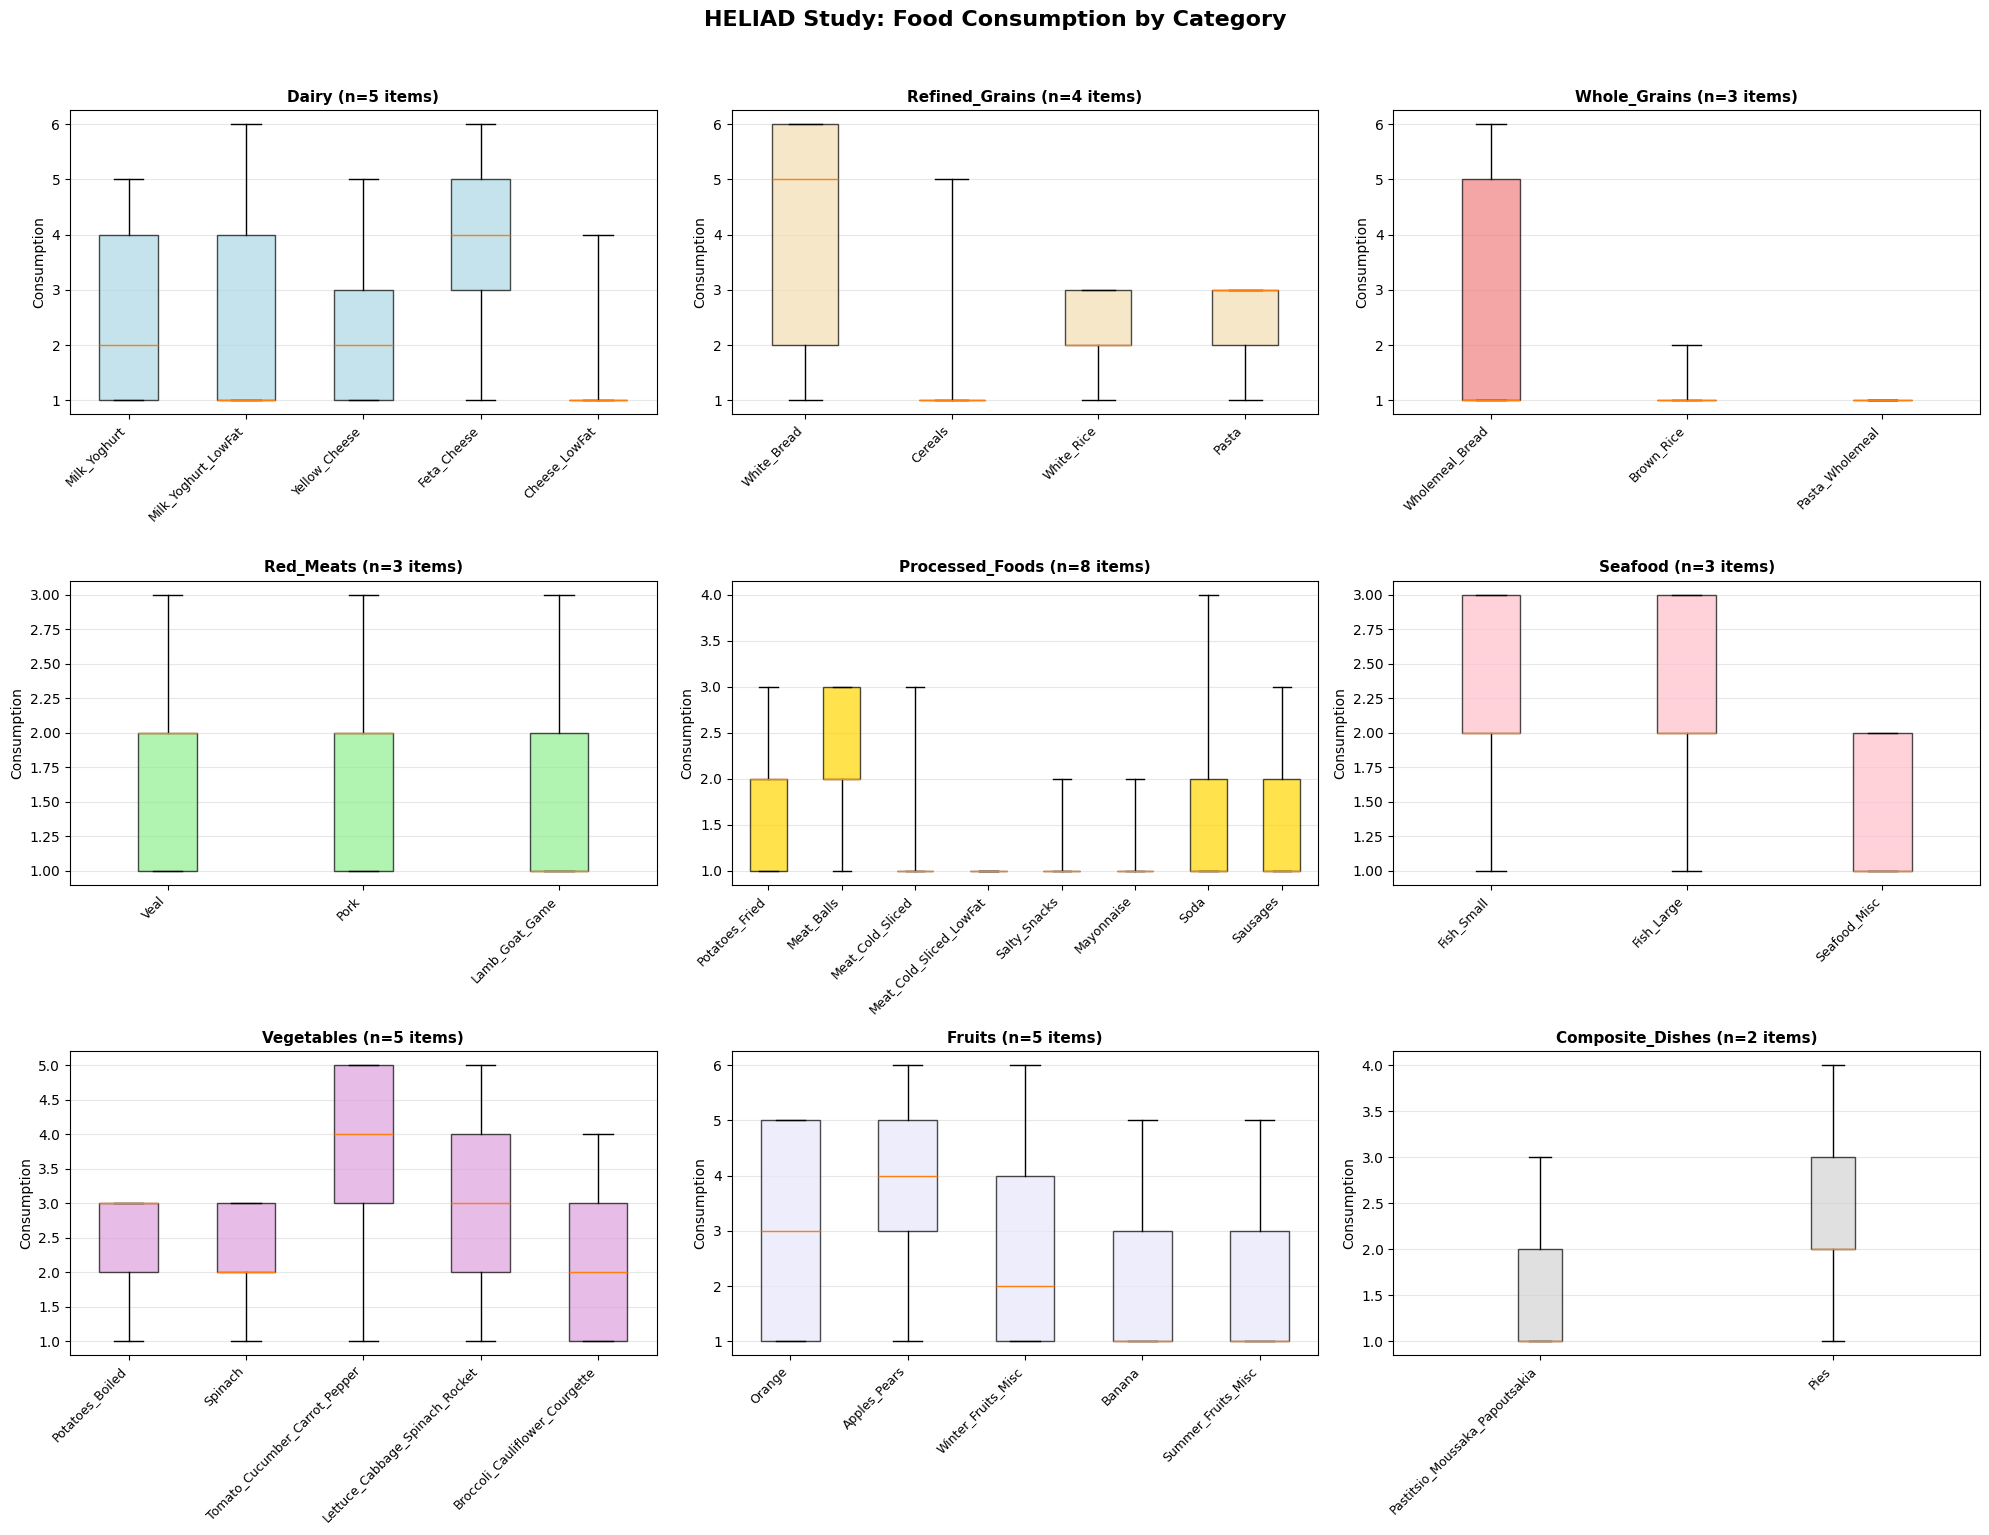

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, (category, foods) in enumerate(nutri_dict_grouped.items()):
    if idx >= len(axes):
        break
        
    ax = axes[idx]
    
    category_data = []
    category_labels = []
    
    for food in foods:
        for ffq_code, food_name in nutridict.items():
            if food_name == food:
                data = hdata[ffq_code].dropna()
                if len(data) > 0:
                    category_data.append(data)
                    category_labels.append(food)
                    break
    
    if category_data:
        bp = ax.boxplot(category_data, vert=True, patch_artist=True,
                       showfliers=False, whis=[5, 95])
        
        for patch in bp['boxes']:
            patch.set_facecolor(category_colors[category])
            patch.set_alpha(0.7)
        
        # Customize
        ax.set_xticks(range(1, len(category_labels) + 1))
        ax.set_xticklabels(category_labels, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Consumption')
        ax.set_title(f'{category} (n={len(category_data)} items)', 
                    fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        

plt.suptitle('HELIAD Study: Food Consumption by Category', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

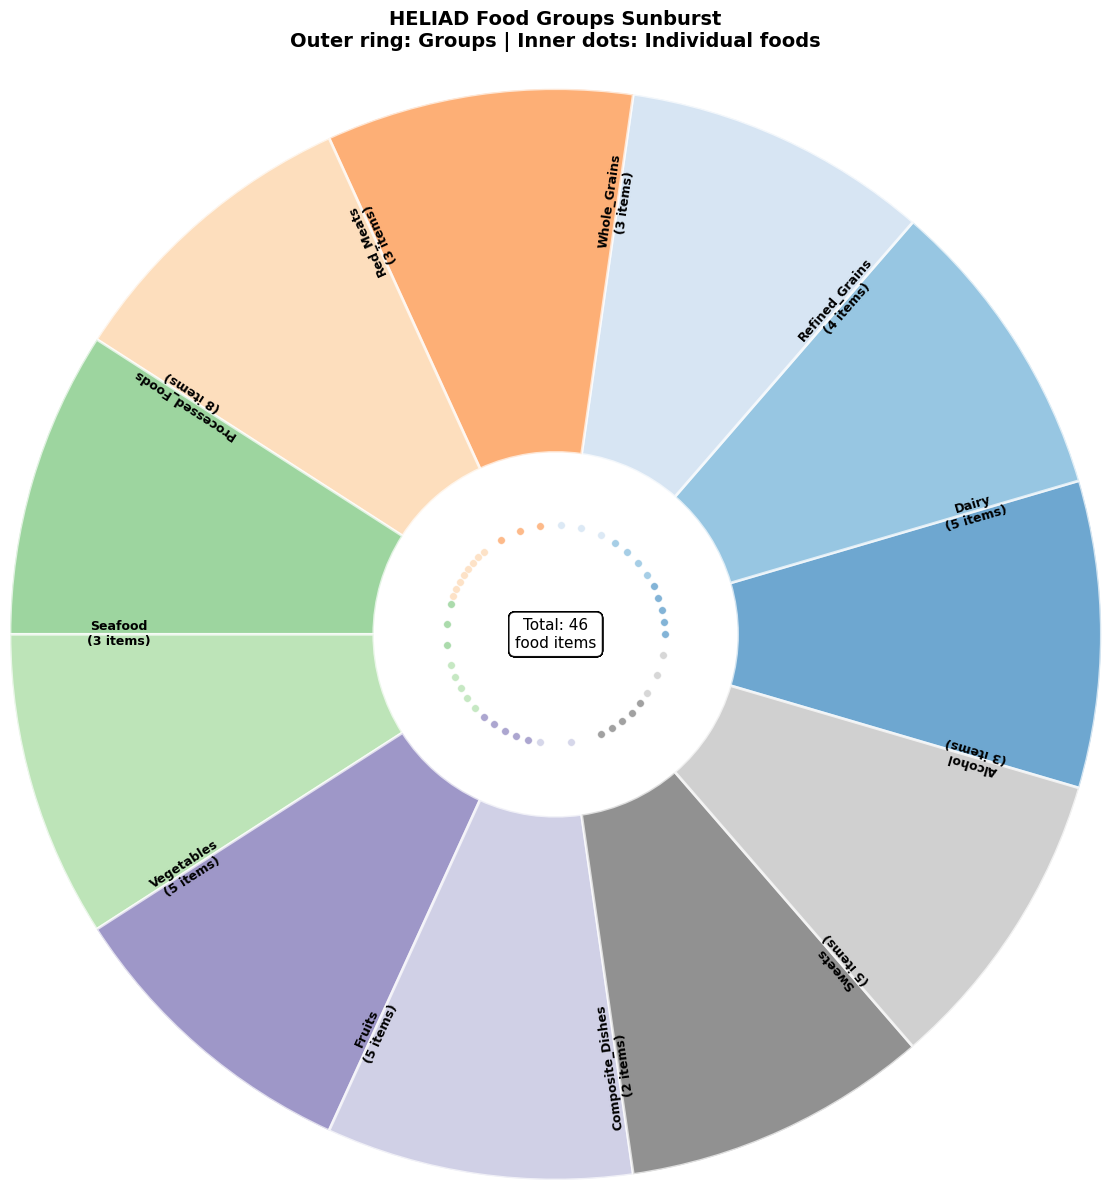

In [39]:
# Create a sunburst chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Calculate angles
group_names = list(nutri_dict_grouped.keys())
n_groups = len(group_names)
group_sizes = [len(foods) for foods in nutri_dict_grouped.values()]

# Colors
cmap = plt.cm.tab20c
colors = [cmap(i/n_groups) for i in range(n_groups)]

# Create wedges for groups
angles = np.linspace(0, 2*np.pi, n_groups, endpoint=False)
width = 2*np.pi / n_groups

# Outer ring: groups
bars = ax.bar(angles, [10]*n_groups, width=width, 
             bottom=5, color=colors, alpha=0.7,
             edgecolor='white', linewidth=2)

# Add group labels
for angle, group, size in zip(angles, group_names, group_sizes):
    rotation = np.degrees(angle + width/2)
    ha = 'left' if angle < np.pi else 'right'
    
    ax.text(angle + width/2, 12, f"{group}\n({size} items)",
            ha='center', va='center',
            rotation=rotation if rotation < 180 else rotation-180,
            fontsize=9, fontweight='bold')

# Inner ring: food items (simplified - just show count)
food_counts = []
for group, foods in nutri_dict_grouped.items():
    for i, food in enumerate(foods):
        # Calculate position
        group_idx = list(nutri_dict_grouped.keys()).index(group)
        food_angle = angles[group_idx] + (i/len(foods)) * width
        
        # Draw small dot for each food
        ax.scatter(food_angle, 3, s=30, color=colors[group_idx], 
                  alpha=0.6, edgecolor='white', linewidth=0.5)
    
    # Add food count in middle
    ax.text(0, 0, f"Total: {sum(group_sizes)}\nfood items",
            ha='center', va='center',
            fontsize=11,
            bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.9))

ax.set_ylim(0, 15)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)

plt.title('HELIAD Food Groups Sunburst\nOuter ring: Groups | Inner dots: Individual foods', 
          fontsize=14, fontweight='bold', pad=30)
plt.tight_layout()
plt.show()

In [12]:
single_items = {
    "Eggs": "Eggs",
    "Chicken": "White_Meats",
    "Legumes": "Legumes",
    "Petit_Pois": "Petit_Pois",
    "Fruits_Dried": "Fruits_Dried",
    "Nuts": "Nuts",
    "Olives": "Olives",
    "Coffee": "Coffee",
    "Tea": "Tea",
    "Olive_Oil_Freq": "Olive_Oil_Freq",
    "Seed_Oil_Freq": "Seed_Oil_Freq",
    "Margarine_Freq": "Margarine_Freq",
    "Butter_Freq": "Butter_Freq"
}

In [ ]:
import numpy as np
def simple_cronbach_alpha(df, items):
    existing_items = [item for item in items if item in df.columns]
    
    if len(existing_items) < 2:
        return np.nan
    
    standardized = df[existing_items].copy()
    for col in existing_items:
        standardized[col] = (df[col] - df[col].mean()) / df[col].std()
    
    total_score = standardized.sum(axis=1)
    total_variance = total_score.var()
    
    item_variances = standardized.var()
    sum_item_variances = item_variances.sum()
    
    k = len(existing_items)
    alpha = (k / (k - 1)) * (1 - (sum_item_variances / total_variance))
    
    return alpha

So here Cronbach's α scores are calculated for the consolidated food groups. None of foods within the group correlates in a statistically satisfactory manner, which is ok since people do not always present consistent patterns in regards to their culinary preferences.

In [ ]:
alpha_results = {}

for group_name, food_items in nutri_dict_grouped.items():
    alpha = simple_cronbach_alpha(heliad_subset_clean, food_items)
    alpha_results[group_name] = alpha
    
    if pd.isna(alpha):
        status = "⚠️  (needs ≥2 items)"
    elif alpha >= 0.7:
        status = "✅ GOOD"
    elif alpha >= 0.6:
        status = "⚠️ QUESTIONABLE"
    else:
        status = "❌ POOR"
    
    print(f"{group_name:20s} α = {alpha:6.3f} {status}")

print("\nInterpretation:")
print("• α ≥ 0.7: Good internal consistency")
print("• 0.6 ≤ α < 0.7: Questionable")
print("• α < 0.6: Poor - reconsider grouping")

Dairy                α = -0.076 ❌ POOR
Refined_Grains       α =  0.211 ❌ POOR
Whole_Grains         α =  0.438 ❌ POOR
Red_Meats            α =  0.201 ❌ POOR
Processed_Foods      α =  0.412 ❌ POOR
Seafood              α =  0.307 ❌ POOR
Vegetables           α =  0.410 ❌ POOR
Fruits               α =  0.195 ❌ POOR
Composite_Dishes     α =  0.086 ❌ POOR
Sweets               α =  0.460 ❌ POOR
Alcohol              α =  0.482 ❌ POOR

Interpretation:
• α ≥ 0.7: Good internal consistency
• 0.6 ≤ α < 0.7: Questionable
• α < 0.6: Poor - reconsider grouping


In [13]:
demographic_cols = ['AgeC', 'SexD', 'BMI']
medical_cols = ['Constipation', 'REM_Sleep_Behavior_Disorder', 
                'Motor_Symptoms_Parkinsonism', 'Fluctuation_Consciousness',
                'Fluctuation_Cognition', 'Orthostatic_Hypotension',
                'Episodes_Blank_Switch_Off']

# Create a new dataframe starting with these
new_df = heliad_subset_clean[demographic_cols + medical_cols].copy()

print(f"✅ New dataframe started with {len(new_df.columns)} demographic/medical columns")
print("Columns:", list(new_df.columns))

✅ New dataframe started with 10 demographic/medical columns
Columns: ['AgeC', 'SexD', 'BMI', 'Constipation', 'REM_Sleep_Behavior_Disorder', 'Motor_Symptoms_Parkinsonism', 'Fluctuation_Consciousness', 'Fluctuation_Cognition', 'Orthostatic_Hypotension', 'Episodes_Blank_Switch_Off']


In [ ]:
def create_composite(df, items, group_name):

    existing_items = [item for item in items if item in df.columns]
    
    if len(existing_items) == 0:
        print(f"⚠️  {group_name}: No items found")
        return pd.Series([np.nan] * len(df)), np.nan
    
    print(f"Creating {group_name} from {len(existing_items)} items...")
    
    zscores = pd.DataFrame()
    for item in existing_items:
        mean_val = df[item].mean()
        std_val = df[item].std()
        if std_val > 0: 
            zscores[item] = (df[item] - mean_val) / std_val
        else:
            zscores[item] = 0
    
    composite = zscores.mean(axis=1)
    
    return composite

print("🔄 Creating food group composites...")
print("="*50)

for group_name, food_items in nutri_dict_grouped.items():
    composite = create_composite(heliad_subset_clean, food_items, group_name)
    
    new_df[group_name] = composite

print(f"\n✅ Added {len(nutri_dict_grouped)} food group composites")

🔄 Creating food group composites...
Creating Dairy from 5 items...
Creating Refined_Grains from 4 items...
Creating Whole_Grains from 3 items...
Creating Red_Meats from 3 items...
Creating Processed_Foods from 8 items...
Creating Seafood from 3 items...
Creating Vegetables from 5 items...
Creating Fruits from 5 items...
Creating Composite_Dishes from 2 items...
Creating Sweets from 5 items...
Creating Alcohol from 3 items...

✅ Added 11 food group composites


In [15]:
print("\n➕ Adding single food items...")
print("="*50)

added_count = 0
for original_name, new_name in single_items.items():
    if original_name in heliad_subset_clean.columns:
        new_df[new_name] = heliad_subset_clean[original_name]
        print(f"✓ {new_name}")
        added_count += 1
    else:
        print(f"✗ {original_name} not found")

print(f"\n✅ Added {added_count} single food items")


➕ Adding single food items...
✓ Eggs
✓ White_Meats
✓ Legumes
✓ Petit_Pois
✓ Fruits_Dried
✓ Nuts
✓ Olives
✓ Coffee
✓ Tea
✓ Olive_Oil_Freq
✓ Seed_Oil_Freq
✓ Margarine_Freq
✓ Butter_Freq

✅ Added 13 single food items


In [71]:
new_df

,AgeC,SexD,BMI,Constipation,REM_Sleep_Behavior_Disorder,Motor_Symptoms_Parkinsonism,Fluctuation_Consciousness,Fluctuation_Cognition,Orthostatic_Hypotension,Episodes_Blank_Switch_Off,...,Eggs,White_Meats,Processed_Meats,Legumes,Petit_Pois,Fruits_Dried,Nuts,Olives,Coffee,Tea
0,76.0,Male,28.28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,1.0
1,83.0,Male,32.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,1.0,3.0,1.0,1.0,1.0,3.0,6.0,1.0
2,87.0,Female,29.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,1.0,3.0,3.0,1.0,2.0,2.0,5.0,1.0
3,71.0,Female,25.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,5.0,5.0
4,78.0,Male,24.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,67.0,Female,29.31,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,3.0,2.0,1.0,1.0,1.0,5.0,1.0
1644,72.0,Female,30.27,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1.0,3.0,3.0,1.0,1.0,2.0,6.0,2.0
1645,70.0,Male,32.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,5.0,1.0
1646,69.0,Female,38.49,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,1.0


In [32]:
available_singles = [food for food in single_items.values() if food in new_df.columns]
print(f"Found {len(available_singles)} single foods in your dataframe:")
for food in available_singles:
    print(f"  • {food}")

for food in available_singles:
    mean_val = new_df[food].mean()
    std_val = new_df[food].std()
    
    if std_val > 0:
        new_df[f"{food}_z"] = (new_df[food] - mean_val) / std_val
        print(f"✓ Created {food}_z (mean={mean_val:.2f}, SD={std_val:.2f})")
    else:
        new_df[f"{food}_z"] = 0
        print(f"⚠️  {food} has no variance (SD=0)")

print(f"\n✅ Created z-scores for {len(available_singles)} single foods")

Found 13 single foods in your dataframe:
  • Eggs
  • White_Meats
  • Legumes
  • Petit_Pois
  • Fruits_Dried
  • Nuts
  • Olives
  • Coffee
  • Tea
  • Olive_Oil_Freq
  • Seed_Oil_Freq
  • Margarine_Freq
  • Butter_Freq
✓ Created Eggs_z (mean=2.38, SD=0.94)
✓ Created White_Meats_z (mean=2.49, SD=0.69)
✓ Created Legumes_z (mean=2.77, SD=0.58)
✓ Created Petit_Pois_z (mean=2.29, SD=0.75)
✓ Created Fruits_Dried_z (mean=1.41, SD=0.91)
✓ Created Nuts_z (mean=2.04, SD=1.22)
✓ Created Olives_z (mean=2.55, SD=1.21)
✓ Created Coffee_z (mean=4.59, SD=1.65)
✓ Created Tea_z (mean=2.43, SD=1.53)
✓ Created Olive_Oil_Freq_z (mean=5.29, SD=0.79)
✓ Created Seed_Oil_Freq_z (mean=1.53, SD=0.86)
✓ Created Margarine_Freq_z (mean=1.52, SD=1.09)
✓ Created Butter_Freq_z (mean=1.41, SD=0.92)

✅ Created z-scores for 13 single foods


In [33]:
new_df.to_csv('heliad_nutrition_medical_composite_zscores.csv', index=False)

In [ ]:
zscore_cols = [col for col in new_df.columns if col.endswith('_z')]
zscores_si = new_df[zscore_cols].copy()
zscores_si.head()

,Eggs_z,White_Meats_z,Legumes_z,Petit_Pois_z,Fruits_Dried_z,Nuts_z,Olives_z,Coffee_z,Tea_z,Olive_Oil_Freq_z,Seed_Oil_Freq_z,Margarine_Freq_z,Butter_Freq_z
0,0.654865,0.732450,0.39775,-0.383227,1.757040,0.783941,-0.454456,0.245494,-0.933644,0.889918,0.549909,0.438197,-0.446025
1,1.713162,2.174129,0.39775,-1.708073,-0.452234,-0.852014,0.373343,0.850099,-0.933644,0.889918,-0.610663,-0.480106,-0.446025
2,2.771459,-0.709229,0.39775,0.941619,-0.452234,-0.034037,-0.454456,0.245494,-0.933644,0.889918,0.549909,-0.480106,-0.446025
3,-0.403431,0.732450,0.39775,0.941619,-0.452234,-0.852014,-1.282256,0.245494,1.684953,0.889918,-0.610663,-0.480106,-0.446025
4,0.654865,0.732450,0.39775,0.941619,-0.452234,0.783941,-1.282256,0.245494,-0.933644,0.889918,-0.610663,-0.480106,-0.446025


In [20]:
!pip install ptitprince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 8.9 MB/s  0:00:00 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 9.3 MB/s  0:00:02 eta 0:00:01
  Created wheel for ptitprince: filename=ptitprince-0.3.1-py3-none-any.whl size=16217 sha256=463b485d4fefec95d70de44f1e6a035efb24cb462cae893d4bbd55f4272bc0bc
  Stored in directory: /Users/kpax/Library/Caches/pip/wheels/5d/79/49/b89a41fd3d8780ce2c21c7f2debe45f3c6b08d8aef400e3df1
Successfully built ptitprince
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [ptitprince]


/Users/kpax/Documents/study/research/HELIAD/code/Heliad-da/.venv/lib/python3.12/site-packages/ptitprince/PtitPrince.py:1070: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


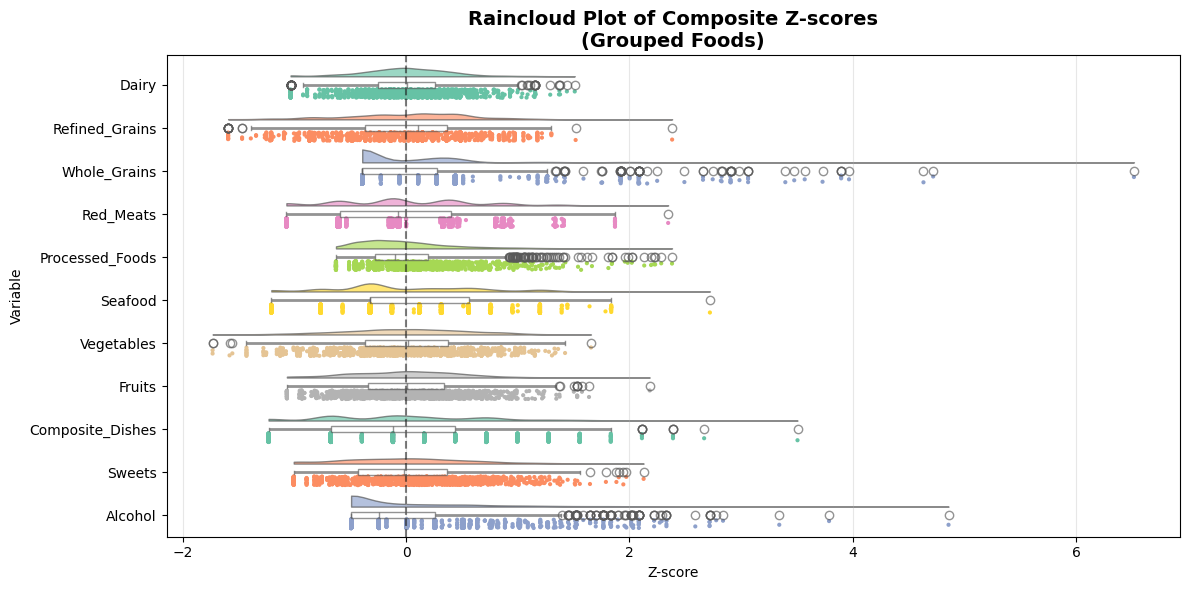

In [44]:
import ptitprince as pt
def plot_raincloud(df, variables, title):
    
    vars_to_plot = [v for v in variables if v in df.columns]
    
    if not vars_to_plot:
        return
    
    plot_df = df[vars_to_plot].melt(var_name='Variable', value_name='Z-score')
    plot_df = plot_df.dropna()
    
    plt.figure(figsize=(12, 6))
    
    ax = pt.RainCloud(x='Variable', y='Z-score', data=plot_df,
                     palette='Set2', bw=0.2, width_viol=0.6,
                     ax=None, orient='h', move=0.2, alpha=0.65)
    
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.xlabel('Z-score')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_raincloud(new_df, nutri_dict_grouped.keys(), 'Raincloud Plot of Composite Z-scores\n(Grouped Foods)')

/Users/kpax/Documents/study/research/HELIAD/code/Heliad-da/.venv/lib/python3.12/site-packages/ptitprince/PtitPrince.py:1070: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


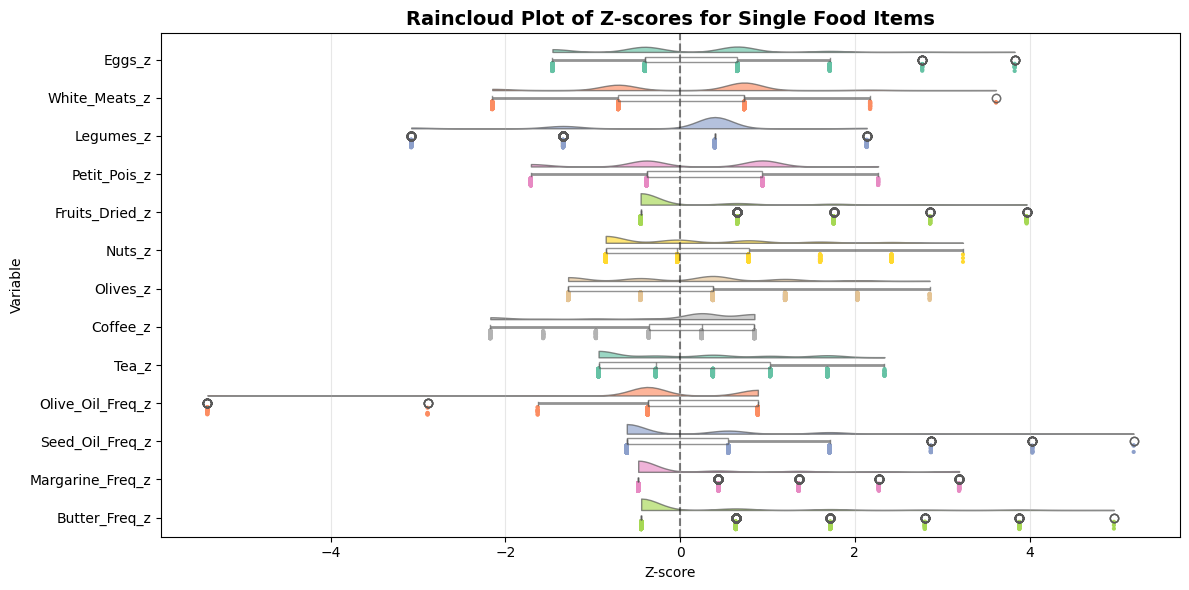

In [45]:
plot_raincloud(new_df, zscore_cols, 'Raincloud Plot of Z-scores for Single Food Items')

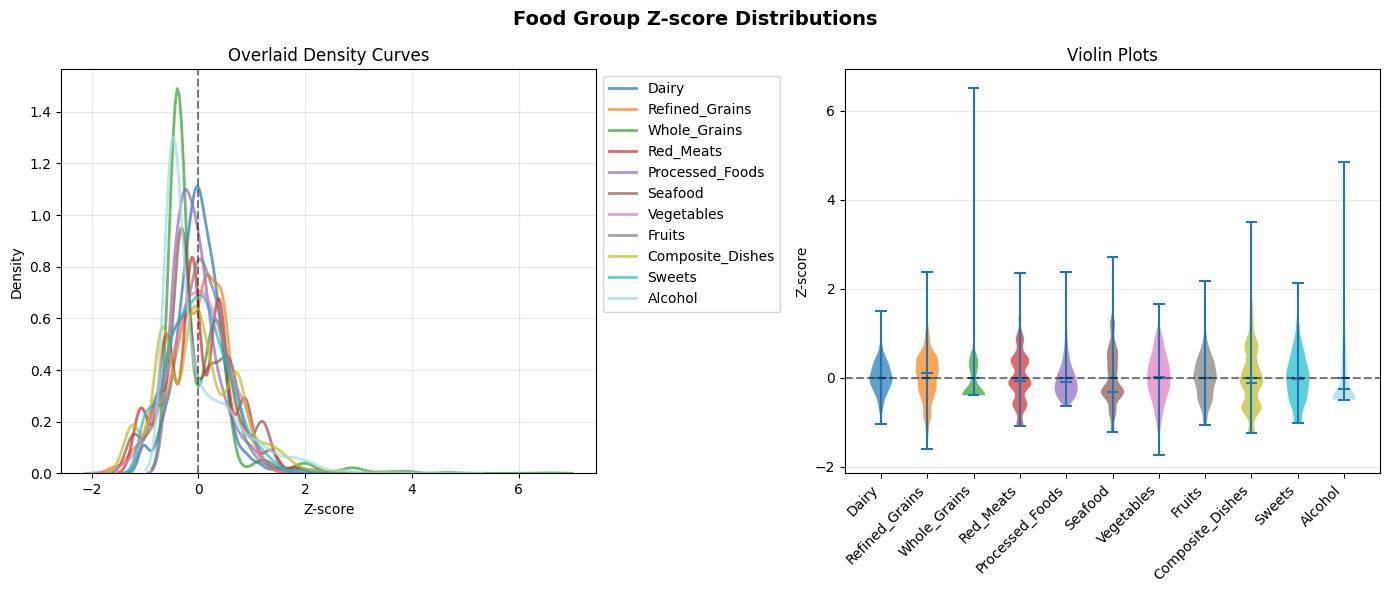

In [30]:
import numpy as np
import seaborn as sns
def plot_zscore_density(df, variable_list, title="Z-score Distributions"):
    
    existing_vars = [var for var in variable_list if var in df.columns]
    
    if not existing_vars:
        print("No variables found")
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    colors = plt.cm.tab20(np.linspace(0, 1, len(existing_vars)))
    
    for var, color in zip(existing_vars, colors):
        data = df[var].dropna()
        if len(data) > 1:
            sns.kdeplot(data=data, ax=axes[0], label=var, 
                       color=color, linewidth=2, alpha=0.7)
    
    axes[0].axvline(x=0, color='black', linestyle='--', alpha=0.5)
    axes[0].set_xlabel('Z-score')
    axes[0].set_ylabel('Density')
    axes[0].set_title('Overlaid Density Curves')
    axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[0].grid(alpha=0.3)
    
    plot_data = []
    labels = []
    
    for var in existing_vars:
        data = df[var].dropna()
        if len(data) > 0:
            plot_data.append(data)
            labels.append(var)
    
    violin = axes[1].violinplot(plot_data, showmeans=True, showmedians=True)
    axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    for pc, color in zip(violin['bodies'], colors[:len(labels)]):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    axes[1].set_xticks(range(1, len(labels) + 1))
    axes[1].set_xticklabels(labels, rotation=45, ha='right')
    axes[1].set_ylabel('Z-score')
    axes[1].set_title('Violin Plots')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

food_groups = list(nutri_dict_grouped.keys())
plot_zscore_density(new_df, food_groups, "Food Group Z-score Distributions")

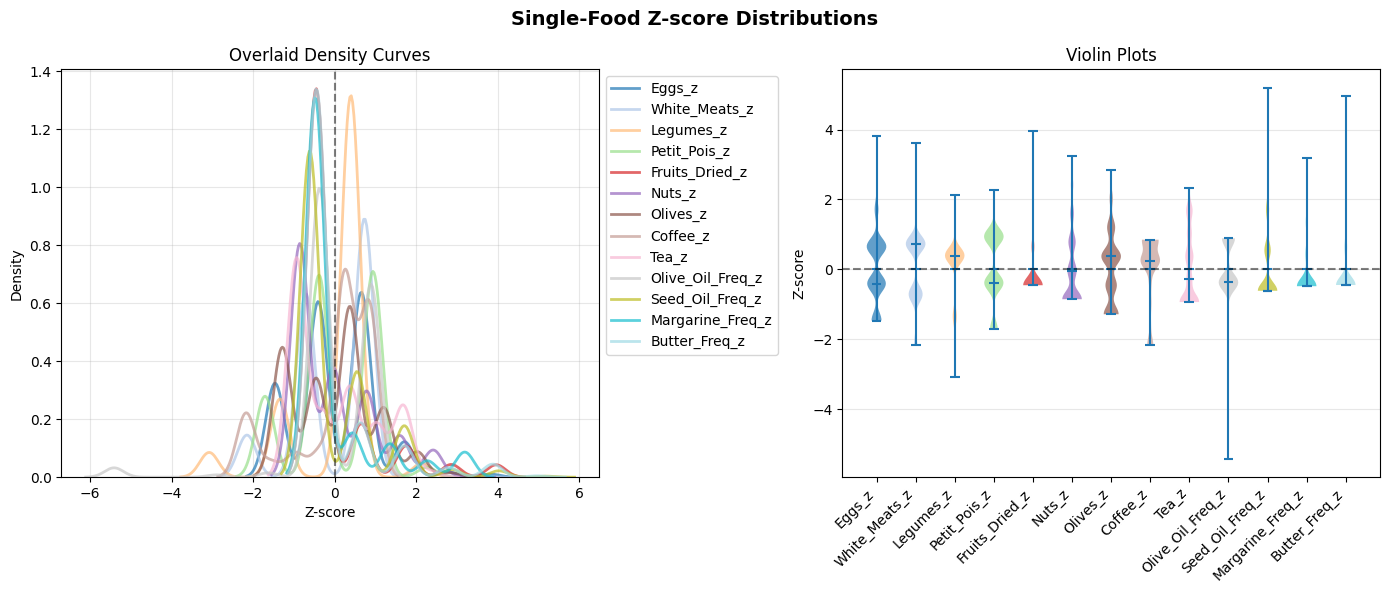

In [46]:
plot_zscore_density(new_df, zscore_cols, "Single-Food Z-score Distributions")